### Team

Shiref Khaled Elhalawany -  221100944

Karim Ashraf Elsayed - 221100391

Bassant Kamal Mesilam - 221100244 

# Section 3: Clustering-based Collaborative Filters

# 3.3.2. Part 2: K-means Clustering based on average number of common ratings

In this step, we prepare the data needed for clustering based on **co-rated items between users**:

1. **Load the full ratings dataset**  

2. **Load the target users (from 3.1.11)**  

3. **Load co-rating users (from 3.1.13)**  

4. **Build the final user set**  

5. **Build lookup structures for collaborative filtering**  

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

dataset_folder = os.path.join(project_root, 'dataset')
results_folder = os.path.join(project_root, 'results')

print(f"Dataset folder: {dataset_folder}")
print(f"Results folder: {results_folder}")

Dataset folder: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\dataset
Results folder: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results


In [2]:
ratings_file = os.path.join(dataset_folder, 'Electronics.csv')
print("Loading ratings data...")
df_ratings = pd.read_csv(
    ratings_file,
    names=["ItemID", "UserID", "Rating", "Timestamp"]
)
print(f"Loaded {len(df_ratings)} ratings.")

df_ratings["UserID"] = df_ratings["UserID"].astype(str)

Loading ratings data...
Loaded 20994353 ratings.


In [3]:
target_users_file = os.path.join(results_folder, '3_1_11_selected_users.csv')
df_target_users = pd.read_csv(target_users_file)

df_target_users = df_target_users[df_target_users["UserID"].notna()]
df_target_users["UserID"] = df_target_users["UserID"].astype(str)

target_users_list = df_target_users["UserID"].tolist()
print(f"Loaded {len(target_users_list)} target users:", target_users_list)

Loaded 1 target users: ['A1ER5AYS3FQ9O3']


In [4]:
co_users_file = os.path.join(results_folder, '3_1_13_co_rating_users.csv')
df_co_users = pd.read_csv(co_users_file)


df_co_users = df_co_users[df_co_users["OtherUser"].notna()]
df_co_users["OtherUser"] = df_co_users["OtherUser"].astype(str)

co_users_list = df_co_users["OtherUser"].tolist()
print(f"Loaded {len(co_users_list)} co-rating users.")

Loaded 16305 co-rating users.


In [5]:
all_users = sorted(set(target_users_list) | set(co_users_list))
print(f"Total unique users (targets + co-rating): {len(all_users)}")

df_ratings_filtered = df_ratings[df_ratings["UserID"].isin(all_users)].copy()
print(f"Unique users in filtered set: {df_ratings_filtered['UserID'].nunique()}")
print(f"Ratings after filtering: {len(df_ratings_filtered)}")

Total unique users (targets + co-rating): 16306
Unique users in filtered set: 16306
Ratings after filtering: 110597


In [6]:
user_ratings_dict = df_ratings_filtered.groupby("UserID").apply(
    lambda x: dict(zip(x["ItemID"], x["Rating"]))
).to_dict()

user_means_dict = df_ratings_filtered.groupby("UserID")["Rating"].mean().to_dict()

print(f"Built user_ratings_dict for {len(user_ratings_dict)} users.")
print(f"Built user_means_dict for {len(user_means_dict)} users.")

user_item_sets = df_ratings_filtered.groupby("UserID")["ItemID"].apply(set).to_dict()
print(f"Created item sets for {len(user_item_sets)} users.")

Built user_ratings_dict for 16306 users.
Built user_means_dict for 16306 users.
Created item sets for 16306 users.


### 3.3.2.1.1 - 3.3.2.1.3
For each user, we measure how many items they share with other users:

- **avg_common** → average number of items rated in common with others  
- **max_common** → highest number of shared items with any one user  
- **min_common** → lowest non-zero count of shared items with another user  

These numbers help quantify how strongly each user is connected to the rest of the dataset.

In [7]:
user_stats = []
users_list = list(user_item_sets.keys())
n_users = len(users_list)

print("Computing co-rating statistics (this may take a while)...")

for i, user_a in enumerate(users_list):
    if i % 100 == 0:
        print(f"Processing user {i}/{n_users}...")
        
    common_counts = []
    items_a = user_item_sets[user_a]
    
    for user_b in users_list:
        if user_a == user_b:
            continue
            
        items_b = user_item_sets[user_b]
        common = len(items_a.intersection(items_b))
        
        if common > 0:
            common_counts.append(common)
            
    if not common_counts:
        avg_common = 0
        max_common = 0
        min_common = 0
    else:
        avg_common = sum(common_counts) / len(users_list) 
        
        avg_common = sum(common_counts) / (n_users - 1)
        max_common = max(common_counts)
        min_common = min(common_counts) 
        
    user_stats.append({
        'user': user_a,
        'avg_common': avg_common,
        'max_common': max_common,
        'min_common': min_common
    })

df_stats = pd.DataFrame(user_stats)
print("Statistics computation complete.")
print(df_stats.head())


Computing co-rating statistics (this may take a while)...
Processing user 0/16306...
Processing user 100/16306...
Processing user 200/16306...
Processing user 300/16306...
Processing user 400/16306...
Processing user 500/16306...
Processing user 600/16306...
Processing user 700/16306...
Processing user 800/16306...
Processing user 900/16306...
Processing user 1000/16306...
Processing user 1100/16306...
Processing user 1200/16306...
Processing user 1300/16306...
Processing user 1400/16306...
Processing user 1500/16306...
Processing user 1600/16306...
Processing user 1700/16306...
Processing user 1800/16306...
Processing user 1900/16306...
Processing user 2000/16306...
Processing user 2100/16306...
Processing user 2200/16306...
Processing user 2300/16306...
Processing user 2400/16306...
Processing user 2500/16306...
Processing user 2600/16306...
Processing user 2700/16306...
Processing user 2800/16306...
Processing user 2900/16306...
Processing user 3000/16306...
Processing user 3100/163

### 3.3.2.1.4

We create a 3-dimensional feature vector for each user using:

- Average number of common items with others  
- Maximum common items with any user  
- Minimum (non-zero) common items  

Output saved to:  
`3_3_2_1_user_co_rating_stats.csv`

In [8]:
feature_vectors = df_stats[['avg_common', 'max_common', 'min_common']].values
print("Feature vectors created.")
print(f"Shape: {feature_vectors.shape}")
print(feature_vectors[:5])

Feature vectors created.
Shape: (16306, 3)
[[0.34406624 3.         1.        ]
 [0.33652254 1.         1.        ]
 [0.06942656 2.         1.        ]
 [0.02808954 1.         1.        ]
 [0.03232137 3.         1.        ]]


In [9]:
output_path = os.path.join(results_folder, '3_3_2_1_user_co_rating_stats.csv')
df_stats.to_csv(output_path, index=False)
print(f"Statistics saved to: {output_path}")

Statistics saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_1_user_co_rating_stats.csv


### 2. Normalize the feature vectors
These helper functions allow us to compute normalization statistics **without using built-in library functions** such as NumPy’s `mean()` or `std()`:

- **manual_mean** → computes mean values column-wise or row-wise
- **manual_std** → computes standard deviation manually
- **manual_zscore** → converts features into Z-scores using the manually computed mean and standard deviation

This ensures that all normalization steps are fully transparent and mathematically controlled during the clustering process.


In [10]:
def manual_mean(matrix, axis=0):
    matrix = np.asarray(matrix, dtype=float)
    
    if axis == 0:  
        n = matrix.shape[0]
        sums = np.sum(matrix, axis=0)
        return sums / n
    elif axis == 1:  
        n = matrix.shape[1]  
        sums = np.sum(matrix, axis=1)
        return sums / n
    else:
        raise ValueError("axis must be 0 or 1")


def manual_std(matrix, axis=0, ddof=0):
    matrix = np.asarray(matrix, dtype=float)
    mean = manual_mean(matrix, axis=axis)

    if axis == 0:
        diff = matrix - mean
        n = matrix.shape[0]
        var = np.sum(diff ** 2, axis=0) / (n - ddof)
        return np.sqrt(var)
    elif axis == 1: 
        diff = matrix - mean[:, None]
        n = matrix.shape[1]
        var = np.sum(diff ** 2, axis=1) / (n - ddof)
        return np.sqrt(var)
    else:
        raise ValueError("axis must be 0 or 1")


def manual_zscore(matrix, means=None, stds=None, axis=0):
    matrix = np.asarray(matrix, dtype=float)

    if means is None:
        means = manual_mean(matrix, axis=axis)
    if stds is None:
        stds = manual_std(matrix, axis=axis)

    stds_safe = stds.copy()
    stds_safe[stds_safe == 0] = 1.0

    return (matrix - means) / stds_safe, means, stds_safe

### 3.3.2.2.1.1

Before clustering, we compute basic descriptive statistics for each of the three co-rating features:

- **Average Common Ratings**  
- **Maximum Common Ratings**  
- **Minimum Common Ratings**

Each feature is evaluated across all users in our filtered dataset.

After running the manual calculations:
- We now know the **typical scale** (mean) for each feature.
- We also understand how **spread out** these values are (standard deviation).
- These results help us verify that each feature contributes fairly during clustering, and no single metric dominates the distance calculation.

In [11]:
if 'df_stats' not in locals():
    stats_path = os.path.join(results_folder, '3_3_2_1_user_co_rating_stats.csv')
    if os.path.exists(stats_path):
        df_stats = pd.read_csv(stats_path)
        feature_vectors = df_stats[['avg_common', 'max_common', 'min_common']].values
        print("Feature vectors loaded from CSV.")
    else:
        print("Error: Statistics file not found. Please run previous cells.")


if 'feature_vectors' in locals():
    means = manual_mean(feature_vectors, axis=0)
    stds = manual_std(feature_vectors, axis=0, ddof=0)

    print("Feature Statistics (manual):")
    print(f"Avg Common: Mean = {means[0]:.4f}, Std = {stds[0]:.4f}")
    print(f"Max Common: Mean = {means[1]:.4f}, Std = {stds[1]:.4f}")
    print(f"Min Common: Mean = {means[2]:.4f}, Std = {stds[2]:.4f}")
else:
    print("Error: feature_vectors not defined.")

Feature Statistics (manual):
Avg Common: Mean = 0.1701, Std = 0.1337
Max Common: Mean = 1.6355, Std = 1.3502
Min Common: Mean = 1.0000, Std = 0.0000


### 3.3.2.2.1.2

In this step, each of the three user co-rating features is normalized independently.
Z-score standardization ensures that:

- All features are on a **comparable scale**
- No single feature **dominates** the clustering process
- The model becomes more **numerically stable and fair**

After normalization, each user receives:

- `avg_common_z` → normalized Average Common Ratings  
- `max_common_z` → normalized Maximum Common Ratings  
- `min_common_z` → normalized Minimum Common Ratings  

These normalized values are stored for later use in clustering.

Output File:  
`3_3_2_2_normalized_user_features.csv`

In [12]:
if 'feature_vectors' in locals():
    normalized_features, means, stds_safe = manual_zscore(
        feature_vectors,
        means=means,
        stds=stds,
        axis=0
    )

    print("Normalized features (first 5 rows, manual):")
    print(normalized_features[:5])
else:
    print("Error: feature_vectors not defined.")

Normalized features (first 5 rows, manual):
[[ 1.30057505  1.01063326  0.        ]
 [ 1.24416848 -0.47065986  0.        ]
 [-0.7529911   0.2699867   0.        ]
 [-1.06208078 -0.47065986  0.        ]
 [-1.03043807  1.01063326  0.        ]]


In [ ]:
if 'normalized_features' in locals():
    df_normalized = df_stats.copy()
    df_normalized['avg_common_z'] = normalized_features[:, 0]
    df_normalized['max_common_z'] = normalized_features[:, 1]
    df_normalized['min_common_z'] = normalized_features[:, 2]

    norm_output_path = os.path.join(results_folder, '3_3_2_2_normalized_user_features.csv')
    df_normalized.to_csv(norm_output_path, index=False)
    print(f"Normalized features saved to: {norm_output_path}")
    print(df_normalized.head())
else:
    print("Error: normalized_features not defined.")

Normalized features saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_2_normalized_user_features.csv
                   user  avg_common  max_common  min_common  avg_common_z  \
0  A00222906VX8GH7X6J6B    0.344066           3           1      1.300575   
1  A0157766PDHFP9ZHMWHK    0.336523           1           1      1.244168   
2  A0269980Q6K7E9SH4XN9    0.069427           2           1     -0.752991   
3  A0290654U8KLU1PQ587E    0.028090           1           1     -1.062081   
4  A0327576DAORMC7JHM7G    0.032321           3           1     -1.030438   

   max_common_z  min_common_z  
0      1.010633           0.0  
1     -0.470660           0.0  
2      0.269987           0.0  
3     -0.470660           0.0  
4      1.010633           0.0  


### 3.3.2.3 Apply K-means clustering with different K values (K = 5, 10, 15, 20, 30, 50)
**Using Manual Implementation**
- We manually cluster users based on their co-rating behavior.
- K-means groups users into `k` clusters by minimizing distances inside each cluster (WCSS).
- The Silhouette Score checks how well users fit in their assigned cluster compared to others.
  - Close to **1** → good clusters
  - Around **0** → overlapping clusters
  - Negative → wrong cluster assignments



In [ ]:
def manual_kmeans(X, k, max_iters=100, tol=1e-4, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]
    
    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == j].mean(axis=0) if np.sum(labels == j) > 0 else centroids[j] for j in range(k)])
        
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
            
        centroids = new_centroids
        
    wcss = 0
    for j in range(k):
        cluster_points = X[labels == j]
        if len(cluster_points) > 0:
            wcss += np.sum((cluster_points - centroids[j])**2)
            
    return labels, centroids, wcss

In [ ]:
def manual_euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def manual_silhouette_score(X, labels):
    n_samples = len(X)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    
    if n_clusters <= 1 or n_clusters >= n_samples:
        return 0.0
    
    silhouette_vals = []
    clusters = {l: X[labels == l] for l in unique_labels}
    
    for i in range(n_samples):
        point = X[i]
        label = labels[i]
        
        own_cluster_points = clusters[label]
        if len(own_cluster_points) > 1:

            dists_a = np.linalg.norm(own_cluster_points - point, axis=1)
            a_i = np.sum(dists_a) / (len(own_cluster_points) - 1)
        else:
            a_i = 0
            
        b_i = np.inf
        for other_label in unique_labels:
            if other_label == label:
                continue
                
            other_cluster_points = clusters[other_label]
            if len(other_cluster_points) > 0:
                dists_b = np.linalg.norm(other_cluster_points - point, axis=1)
                mean_dist_b = np.mean(dists_b)
                if mean_dist_b < b_i:
                    b_i = mean_dist_b
        
        if b_i == np.inf: 
            b_i = 0
            
        max_ab = max(a_i, b_i)
        if max_ab == 0:
            s_i = 0
        else:
            s_i = (b_i - a_i) / max_ab
            
        silhouette_vals.append(s_i)
        
    return np.mean(silhouette_vals)

### 3.3.2.3.1 - 3.3.2.3.
In this step, we run **manual K-means clustering** on the normalized co-rating
features (`avg_common_z`, `max_common_z`, `min_common_z`) for different values of K
(5, 10, 15, 20, 30, 50).

For each K, we:
- Cluster users using the manual K-means function.
- Compute how tight the clusters are using **WCSS** (Within-Cluster Sum of Squares).
- Evaluate cluster quality using the **Silhouette Score**.
- Save:
  - A file with each user’s cluster ID and normalized features:
    `3_3_2_3_2_clusters_kK.csv`
  - A file with the cluster centroids for that K:
    `3_3_2_3_2_centroids_kK.csv`

Finally, we store all K values with their WCSS and Silhouette scores in:
`3_3_2_3_3_clustering_metrics.csv`, so we can later choose the best K.

In [ ]:
K_values = [5, 10, 15, 20, 30, 50]
print(f"K values to test: {K_values}")

kmeans_results = {}
wcss_values = []
silhouette_scores = []

if 'normalized_features' in locals():
    print("Starting Manual K-means clustering...")
    for K in K_values:
        print(f"  Running Manual K-means for K={K}...")
        
        assignments, centroids, wcss = manual_kmeans(normalized_features, K)
        
        sil_score = manual_silhouette_score(normalized_features, assignments)
        
        kmeans_results[K] = {
            'assignments': assignments,
            'centroids': centroids,
            'wcss': wcss
        }
        
        wcss_values.append(wcss)
        silhouette_scores.append(sil_score)
        
        print(f"    K={K}: WCSS={wcss:.2f}, Silhouette={sil_score:.4f}")
        
        df_assignments = df_stats.copy()
        df_assignments['ClusterID'] = assignments
        df_assignments['avg_common_z'] = normalized_features[:, 0]
        df_assignments['max_common_z'] = normalized_features[:, 1]
        df_assignments['min_common_z'] = normalized_features[:, 2]
        
        assign_path = os.path.join(results_folder, f'3_3_2_3_2_clusters_k{K}.csv')
        df_assignments.to_csv(assign_path, index=False)
        
        df_centroids = pd.DataFrame(centroids, columns=['Centroid_avg_z', 'Centroid_max_z', 'Centroid_min_z'])
        df_centroids['ClusterID'] = range(K)
        centroid_path = os.path.join(results_folder, f'3_3_2_3_2_centroids_k{K}.csv')
        df_centroids.to_csv(centroid_path, index=False)

    print("Clustering complete.")
    
    df_metrics = pd.DataFrame({
        'K': K_values,
        'WCSS': wcss_values,
        'SilhouetteScore': silhouette_scores
    })
    
    metrics_path = os.path.join(results_folder, '3_3_2_3_3_clustering_metrics.csv')
    df_metrics.to_csv(metrics_path, index=False)
    print(f"Metrics saved to: {metrics_path}")
    print(df_metrics)

else:
    print("Error: normalized_features not defined.")

K values to test: [5, 10, 15, 20, 30, 50]
Starting Manual K-means clustering...
  Running Manual K-means for K=5...


    K=5: WCSS=7257.39, Silhouette=0.5258
  Running Manual K-means for K=10...
    K=10: WCSS=2575.74, Silhouette=0.7447
  Running Manual K-means for K=15...
    K=15: WCSS=2622.72, Silhouette=0.7618
  Running Manual K-means for K=20...
    K=20: WCSS=2448.85, Silhouette=0.7579
  Running Manual K-means for K=30...
    K=30: WCSS=1169.01, Silhouette=0.7148
  Running Manual K-means for K=50...
    K=50: WCSS=824.30, Silhouette=0.7380
Clustering complete.
Metrics saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_3_3_clustering_metrics.csv
    K         WCSS  SilhouetteScore
0   5  7257.388924         0.525791
1  10  2575.744866         0.744694
2  15  2622.723412         0.761752
3  20  2448.854352         0.757902
4  30  1169.008773         0.714805
5  50   824.303277         0.737952


### 4. Determine the optimal K value

To choose the best K for our **co-rating based K-means clustering**, we analyze two
evaluation metrics:

1️- **Elbow Curve** — WCSS vs. K  
Shows how compact the clusters are.  
We look for an “elbow point” where improvements begin to slow down.

2️- **Silhouette Score Curve** — Silhouette vs. K  
Measures how well-separated the clusters are.  
Higher values indicate better-defined clusters.

Both curves are plotted using the metrics stored in:
`3_3_2_3_3_clustering_metrics.csv`



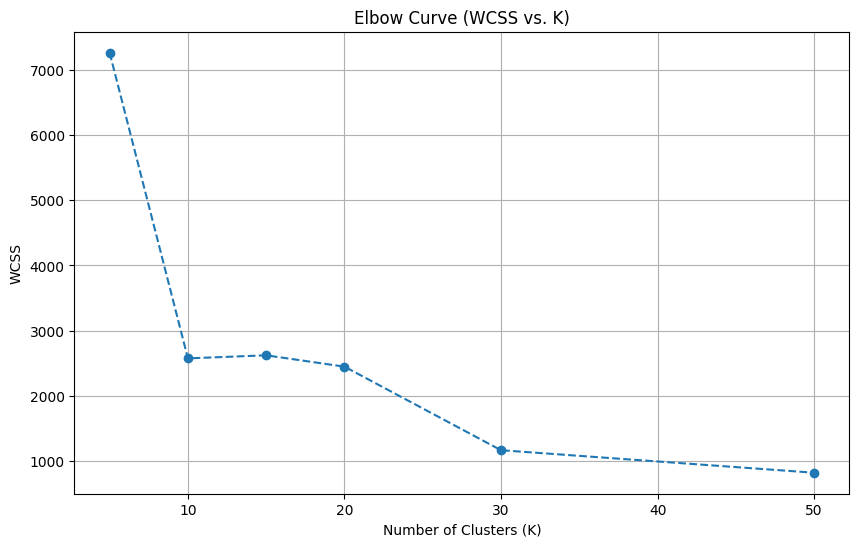

In [ ]:
import matplotlib.pyplot as plt

if 'df_metrics' not in locals():
    metrics_path = os.path.join(results_folder, '3_3_2_3_3_clustering_metrics.csv')
    if os.path.exists(metrics_path):
        df_metrics = pd.read_csv(metrics_path)
    else:
        print("Error: Metrics file not found.")

if 'df_metrics' in locals():
    plt.figure(figsize=(10, 6))
    plt.plot(df_metrics['K'], df_metrics['WCSS'], marker='o', linestyle='--')
    plt.title('Elbow Curve (WCSS vs. K)')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()
else:
    print("Error: df_metrics not defined.")

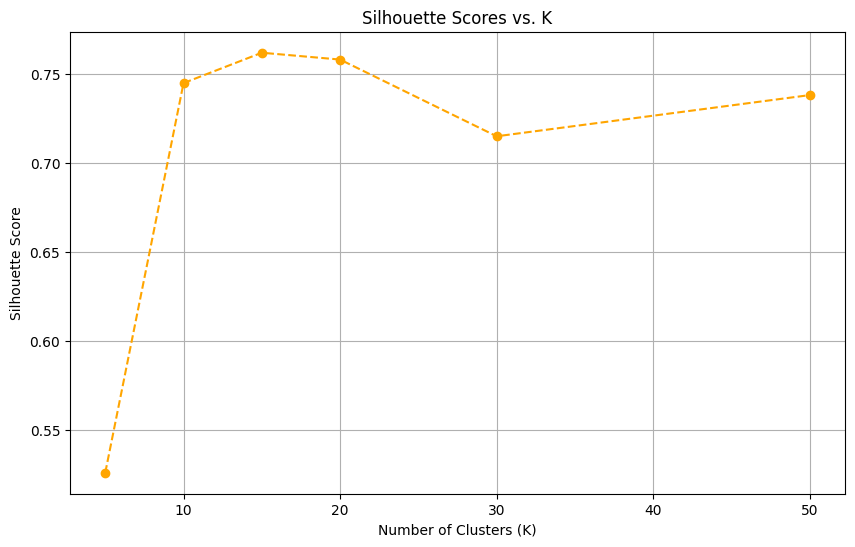

In [ ]:
if 'df_metrics' in locals():
    plt.figure(figsize=(10, 6))
    plt.plot(df_metrics['K'], df_metrics['SilhouetteScore'], marker='o', linestyle='--', color='orange')
    plt.title('Silhouette Scores vs. K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()
else:
    print("Error: df_metrics not defined.")

### 5. Analyze the characteristics of each cluster (using optimal K)


### 3.3.2.5
Based on the analysis from the elbow and silhouette plots, we manually select the best
number of clusters. This K value represents a balance between:

- Good cluster separation (high silhouette score)  
- Reduced within-cluster variance (lower WCSS)  
- Practical computational efficiency

We then load the corresponding cluster assignments that were previously saved during
the K-means clustering process.

In [ ]:
optimal_k = 30 
print(f"Selected Optimal K: {optimal_k}")

assign_path = os.path.join(results_folder, f'3_3_2_3_2_clusters_k{optimal_k}.csv')

if os.path.exists(assign_path):
    df_optimal = pd.read_csv(assign_path)
    print(f"Loaded assignments for K={optimal_k}")
    print(df_optimal.head())
else:
    print(f"Error: Assignments for K={optimal_k} not found. Please run the clustering step for this K.")

Selected Optimal K: 30
Loaded assignments for K=30
                   user  avg_common  max_common  min_common  ClusterID  \
0  A00222906VX8GH7X6J6B    0.344066           3           1         24   
1  A0157766PDHFP9ZHMWHK    0.336523           1           1          9   
2  A0269980Q6K7E9SH4XN9    0.069427           2           1         15   
3  A0290654U8KLU1PQ587E    0.028090           1           1         27   
4  A0327576DAORMC7JHM7G    0.032321           3           1         12   

   avg_common_z  max_common_z  min_common_z  
0      1.300575      1.010633           0.0  
1      1.244168     -0.470660           0.0  
2     -0.752991      0.269987           0.0  
3     -1.062081     -0.470660           0.0  
4     -1.030438      1.010633           0.0  


### 3.3.2.5.1
For the selected optimal K value, we now examine how users behave inside each cluster
by calculating:

- Average number of co-rated items with other users
- Maximum number of co-rated items
- Minimum number of co-rated items (excluding zero overlaps)
- Number of users in each cluster

These metrics reflect how strongly users are connected through shared item ratings.

In [ ]:
if 'df_optimal' in locals():
    cluster_stats = df_optimal.groupby('ClusterID')[['avg_common', 'max_common', 'min_common']].mean().reset_index()
    
    cluster_counts = df_optimal['ClusterID'].value_counts().reset_index()
    cluster_counts.columns = ['ClusterID', 'UserCount']
    
    cluster_stats = pd.merge(cluster_stats, cluster_counts, on='ClusterID')
    
    print("Cluster Statistics (Average Co-rating Metrics):")
    print(cluster_stats)
    
    stats_output_path = os.path.join(results_folder, f'3_3_2_5_1_cluster_stats_k{optimal_k}.csv')
    cluster_stats.to_csv(stats_output_path, index=False)
    print(f"Cluster statistics saved to: {stats_output_path}")
else:
    print("Error: df_optimal not defined.")

Cluster Statistics (Average Co-rating Metrics):
    ClusterID  avg_common  max_common  min_common  UserCount
0           0    0.187731    1.000000         1.0         20
1           1    0.086788    1.000000         1.0       1629
2           2    0.058044    4.882736         1.0        307
3           3    0.157968   29.733333         1.0         15
4           4    0.578878    2.900000         1.0         10
5           5    0.394419    2.000000         1.0          2
6           6    0.187118    1.000000         1.0         70
7           7    0.074171   10.805556         1.0         72
8           8    0.012520    1.000000         1.0       1281
9           9    0.336523    1.000000         1.0       2557
10         10    0.033099    1.000000         1.0        651
11         11    0.336618    1.000000         1.0        257
12         12    0.022805    2.193416         1.0       1458
13         15    0.088295    2.197640         1.0       1017
14         17    0.407871    3.000000

### 3.3.2.5.2
We detect clusters where users have strong co-rating connections with others.
These are clusters with a high average number of shared item ratings between users.

To find these clusters, we sort clusters by their average co-rating value in
descending order and highlight those with the strongest overlap behavior.

In [ ]:
if 'cluster_stats' in locals():
    high_overlap_clusters = cluster_stats.sort_values(by='avg_common', ascending=False)
    
    print("High Overlap Clusters (Sorted by Avg Common Ratings):")
    print(high_overlap_clusters.head())
    
    high_output_path = os.path.join(results_folder, f'3_3_2_5_2_high_overlap_clusters_k{optimal_k}.csv')
    high_overlap_clusters.to_csv(high_output_path, index=False)
    print(f"High overlap clusters saved to: {high_output_path}")
else:
    print("Error: cluster_stats not defined.")

High Overlap Clusters (Sorted by Avg Common Ratings):
    ClusterID  avg_common  max_common  min_common  UserCount
4           4    0.578878         2.9         1.0         10
14         17    0.407871         3.0         1.0          3
5           5    0.394419         2.0         1.0          2
16         20    0.343902         2.0         1.0        251
20         26    0.337839         2.0         1.0       1822
High overlap clusters saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_5_2_high_overlap_clusters_k30.csv


### 3.3.2.5.3
These clusters contain users who share fewer common rated items with others.
We detect them by sorting clusters in ascending order based on the average number
of shared ratings. These clusters represent users with weaker co-rating
relationships and lower similarity potential.

In [ ]:
if 'cluster_stats' in locals():
    low_overlap_clusters = cluster_stats.sort_values(by='avg_common', ascending=True)
    
    print("Low Overlap Clusters (Sorted by Avg Common Ratings):")
    print(low_overlap_clusters.head())
    
    low_output_path = os.path.join(results_folder, f'3_3_2_5_3_low_overlap_clusters_k{optimal_k}.csv')
    low_overlap_clusters.to_csv(low_output_path, index=False)
    print(f"Low overlap clusters saved to: {low_output_path}")
else:
    print("Error: cluster_stats not defined.")

Low Overlap Clusters (Sorted by Avg Common Ratings):
    ClusterID  avg_common  max_common  min_common  UserCount
15         18    0.004577    1.000000         1.0        814
8           8    0.012520    1.000000         1.0       1281
12         12    0.022805    2.193416         1.0       1458
21         27    0.027619    1.000000         1.0        560
10         10    0.033099    1.000000         1.0        651
Low overlap clusters saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_5_3_low_overlap_clusters_k30.csv


### 3.3.2.5.4
A 3D scatter plot is generated using the normalized features:
- **X-axis**: Average number of common rated items (Z-score)
- **Y-axis**: Maximum number of common rated items (Z-score)
- **Z-axis**: Minimum number of common rated items (Z-score)

Each point represents a user, and colors distinguish different clusters.

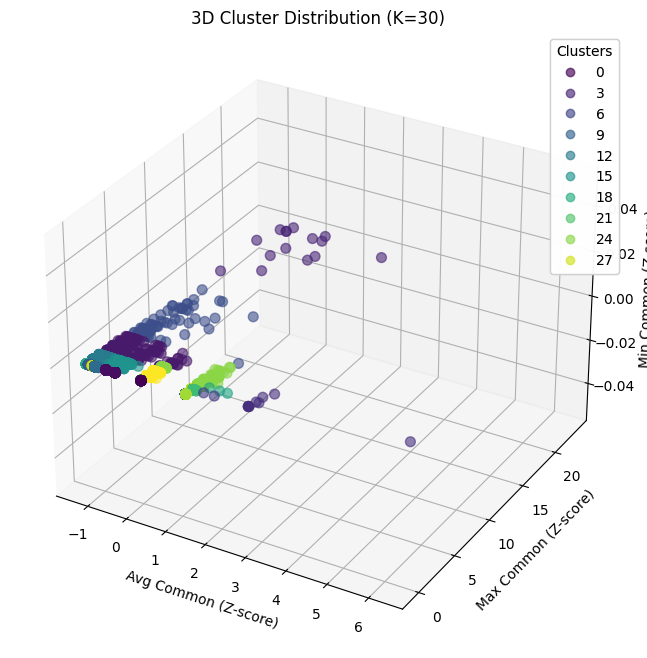

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

if 'df_optimal' in locals():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    
    scatter = ax.scatter(
        df_optimal['avg_common_z'],
        df_optimal['max_common_z'],
        df_optimal['min_common_z'],
        c=df_optimal['ClusterID'],
        cmap='viridis',
        s=50,
        alpha=0.6
    )
    
    ax.set_xlabel('Avg Common (Z-score)')
    ax.set_ylabel('Max Common (Z-score)')
    ax.set_zlabel('Min Common (Z-score)')
    ax.set_title(f'3D Cluster Distribution (K={optimal_k})')
    
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    
    plt.show()
else:
    print("Error: df_optimal not defined.")

### 6. Apply collaborative filtering within clusters


### 3.3.2.6.1
Each target user (from *Section 3.1.11*) is mapped to their corresponding cluster based on the optimal K selected in this section.  
This mapping helps us:

✔ Understand where each important user lies in the clustering structure  
✔ Identify whether the system correctly grouped similar behavioral profiles  
✔ Prepare for cluster-based collaborative filtering later on

The output is a small table containing:
- **UserID**  
- **Assigned ClusterID**

In [ ]:
target_users_file = os.path.join(results_folder, '3_1_11_selected_users.csv')
df_target_users = pd.read_csv(target_users_file)
print(df_target_users.columns)
print(df_target_users.head())

Index(['UserID', 'Ratings', 'Percentage'], dtype='object')
           UserID  Ratings  Percentage
0  A1ER5AYS3FQ9O3     45.0        0.01
1             NaN      NaN         NaN
2             NaN      NaN         NaN


In [ ]:
target_users_file = os.path.join(results_folder, '3_1_11_selected_users.csv')
if os.path.exists(target_users_file):
    df_target_users = pd.read_csv(target_users_file)
    target_users_list = df_target_users['UserID'].tolist()
    print(f"Loaded {len(target_users_list)} target users.")
else:
    print("Error: Target users file not found.")
    target_users_list = []

if 'df_optimal' in locals() and target_users_list:
    target_user_clusters = df_optimal[df_optimal['user'].isin(target_users_list)][['user', 'ClusterID']]
    print("Target User Cluster Assignments:")
    print(target_user_clusters)
else:
    print("Error: df_optimal or target_users_list not defined.")


Loaded 3 target users.
Target User Cluster Assignments:
                user  ClusterID
1800  A1ER5AYS3FQ9O3          4


### 3.3.2.6.2 - 3.3.2.6.3
Here we calculate how similar each **target user** is to other users **in the same cluster**, instead of comparing with everyone in the dataset.

What we do:
- Find users **in the same cluster** as each target user.
- Compute **mean-centered cosine similarity** only with those users who share rated items.
- Count **how many items** they both rated (CommonItems).
- Apply a **discount factor** so that similarities based on very few common items are **reduced**.

Output saved to:
`3_3_2_6_3_cluster_similarities.csv`

In [ ]:
def manual_mean_centered_cosine(user1, user2, user_ratings, user_means):
    
    u1_items = user_ratings.get(user1, {})
    u2_items = user_ratings.get(user2, {})
    
    common_items = set(u1_items.keys()) & set(u2_items.keys())
    n_common = len(common_items)
    
    if n_common == 0:
        return 0.0, 0
        
    mu1 = user_means.get(user1, 0)
    mu2 = user_means.get(user2, 0)
    
    numerator = 0.0
    denom1 = 0.0
    denom2 = 0.0
    
    for item in common_items:
        r1 = u1_items[item] - mu1
        r2 = u2_items[item] - mu2
        
        numerator += r1 * r2
        denom1 += r1**2
        denom2 += r2**2
        
    if denom1 == 0 or denom2 == 0:
        return 0.0, n_common
        
    similarity = numerator / (np.sqrt(denom1) * np.sqrt(denom2))
    return similarity, n_common

def calculate_discounted_similarity(sim, n_common, beta=5):
    df = min(n_common, beta) / beta
    return sim * df

In [ ]:
BETA = 30

similarity_results = []

if 'target_user_clusters' in locals():
    for _, row in target_user_clusters.iterrows():
        t_user = row['user']
        cluster_id = row['ClusterID']
        
        cluster_users = df_optimal[df_optimal['ClusterID'] == cluster_id]['user'].tolist()
        
        print(f"Processing Target User: {t_user} (Cluster {cluster_id}, {len(cluster_users)} users)")
        
        for other_user in cluster_users:
            if t_user == other_user:
                continue
                
            sim, n_common = manual_mean_centered_cosine(t_user, other_user, user_ratings_dict, user_means_dict)
            
            ds = calculate_discounted_similarity(sim, n_common, beta=BETA)
            
            similarity_results.append({
                'TargetUser': t_user,
                'OtherUser': other_user,
                'ClusterID': cluster_id,
                'Similarity': sim,
                'CommonItems': n_common,
                'DiscountedSimilarity': ds
            })

    df_similarities = pd.DataFrame(similarity_results)
    print("Similarity computation complete.")
    print(df_similarities.head())
    
    sim_output_path = os.path.join(results_folder, '3_3_2_6_3_cluster_similarities.csv')
    df_similarities.to_csv(sim_output_path, index=False)
    print(f"Similarities saved to: {sim_output_path}")
else:
    print("Error: target_user_clusters not defined.")

Processing Target User: A1ER5AYS3FQ9O3 (Cluster 4, 10 users)
Similarity computation complete.
       TargetUser       OtherUser  ClusterID  Similarity  CommonItems  \
0  A1ER5AYS3FQ9O3  A1ZLRZ3XIGNRNJ          4    0.000000            2   
1  A1ER5AYS3FQ9O3  A28YUFBI33QZ28          4    0.969689            2   
2  A1ER5AYS3FQ9O3  A2BPW6VO14ZJ9N          4   -0.277540            2   
3  A1ER5AYS3FQ9O3  A2P4YA02LH6N12          4   -0.277540            2   
4  A1ER5AYS3FQ9O3  A2TNAFIVKHR2I3          4    0.000000            2   

   DiscountedSimilarity  
0              0.000000  
1              0.064646  
2             -0.018503  
3             -0.018503  
4              0.000000  
Similarities saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_6_3_cluster_similarities.csv


### 3.3.2.6.4
After calculating within-cluster similarities, we select only the most reliable neighbors for each target user:

What we do:
- Rank users in the same cluster by **Discounted Similarity** (DS).
- Select the **top 20%** of them.
- Ensure at least **one strong neighbor** is always chosen.

Output saved to:
`3_3_2_6_4_top_neighbors.csv`

In [ ]:
top_n_percent = 0.20
top_neighbors_list = []

if 'df_similarities' in locals() and not df_similarities.empty:
    for t_user, group in df_similarities.groupby('TargetUser'):
        sorted_group = group.sort_values(by='DiscountedSimilarity', ascending=False)
        
        n_neighbors = int(len(sorted_group) * top_n_percent)
        n_neighbors = max(1, n_neighbors) 
        
        top_neighbors = sorted_group.head(n_neighbors)
        top_neighbors_list.append(top_neighbors)
        
    df_top_neighbors = pd.concat(top_neighbors_list)
    print(f"Selected top {top_n_percent*100}% neighbors for each target user.")
    print(df_top_neighbors.head())
    
    top_output_path = os.path.join(results_folder, '3_3_2_6_4_top_neighbors.csv')
    df_top_neighbors.to_csv(top_output_path, index=False)
    print(f"Top neighbors saved to: {top_output_path}")
else:
    print("Error: df_similarities is empty or not defined.")

Selected top 20.0% neighbors for each target user.
       TargetUser       OtherUser  ClusterID  Similarity  CommonItems  \
1  A1ER5AYS3FQ9O3  A28YUFBI33QZ28          4    0.969689            2   

   DiscountedSimilarity  
1              0.064646  
Top neighbors saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_6_4_top_neighbors.csv


### 3.3.2.6.5
We predict ratings for items using **only neighbors inside the same cluster**:

- Use the **top 20% most similar** neighbors (based on Discounted Similarity).
- Predict ratings for:
  - The selected **target items**, and
  - **All other items** the user hasn’t rated yet.

Outputs saved:
- Predictions for **target items** →  
  `3_3_2_6_5_cluster_based_predictions.csv`
- Predictions for **all unknown items** →  
  `3_3_2_6_5_cluster_based_predictions_all_items.csv`

In [ ]:
def manual_predict(user, item, neighbors, user_ratings, user_means):    
    numerator = 0.0
    denominator = 0.0
    
    mu_u = user_means.get(user, 0)
    
    for _, row in neighbors.iterrows():
        other_user = row['OtherUser']
        sim = row['DiscountedSimilarity']
        
        r_v = user_ratings.get(other_user, {}).get(item)
        
        if r_v is not None:
            mu_v = user_means.get(other_user, 0)
            numerator += sim * (r_v - mu_v)
            denominator += abs(sim)
            
    if denominator == 0:
        return mu_u
        
    return mu_u + (numerator / denominator)


def predict_ratings(df_top_users, user_item_ratings, sim_col='Similarity'):
    predictions = []

    for target_user, group in df_top_users.groupby('TargetUser'):
        target_user_items = set(user_item_ratings.get(target_user, {}).keys())
        
        candidate_items = set()
        for _, row in group.iterrows():
            other_user = row['OtherUser']
            other_user_items = user_item_ratings.get(other_user, {}).keys()
            candidate_items.update(other_user_items)
        
        unknown_items = candidate_items - target_user_items
        
        for item in unknown_items:
            numerator = 0.0
            denominator = 0.0
            
            for _, row in group.iterrows():
                other_user = row['OtherUser']
                
                similarity = row[sim_col]
                
                rating = user_item_ratings.get(other_user, {}).get(item)
                
                if rating is not None:
                    numerator += similarity * rating
                    denominator += abs(similarity)
            
            if denominator > 0:
                predicted_rating = numerator / denominator
                predictions.append({
                    'TargetUser': target_user,
                    'Item': item,
                    'PredictedRating': round(predicted_rating, 2),
                    'SimilarityType': sim_col
                })
                
    return pd.DataFrame(predictions)

In [ ]:
target_items_file = os.path.join(results_folder, '3_1_12_selected_items.csv')
if os.path.exists(target_items_file):
    df_target_items = pd.read_csv(target_items_file)
    target_items_list = df_target_items['ItemID'].tolist()
    print(f"Loaded {len(target_items_list)} target items.")
else:
    print("Error: Target items file not found.")
    target_items_list = []


predictions = []

if 'df_top_neighbors' in locals() and target_items_list:
    for t_user in df_top_neighbors['TargetUser'].unique():
        user_neighbors = df_top_neighbors[df_top_neighbors['TargetUser'] == t_user]
        
        for item in target_items_list:
            
            pred_rating = manual_predict(t_user, item, user_neighbors, user_ratings_dict, user_means_dict)
            
            predictions.append({
                'TargetUser': t_user,
                'Item': item,
                'PredictedRating': pred_rating
            })
            
    df_predictions = pd.DataFrame(predictions)
    print("Predictions complete.")
    print(df_predictions.head())
    
    pred_output_path = os.path.join(results_folder, '3_3_2_6_5_cluster_based_predictions.csv')
    df_predictions.to_csv(pred_output_path, index=False)
    print(f"Predictions saved to: {pred_output_path}")
else:
    print("Error: df_top_neighbors or target_items_list not defined.")

Loaded 2 target items.
Predictions complete.
       TargetUser        Item  PredictedRating
0  A1ER5AYS3FQ9O3  B000JE4594         4.288889
1  A1ER5AYS3FQ9O3  B00L38GD2W         4.288889
Predictions saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_6_5_cluster_based_predictions.csv


In [ ]:
if 'df_top_neighbors' in locals():
    print(f"Loaded {len(df_top_neighbors)} neighbor rows for prediction.")
    
    df_cluster_preds = predict_ratings(
        df_top_neighbors,
        user_ratings_dict,         
        sim_col='DiscountedSimilarity'  
    )
    
    if 'df_optimal' in locals():
        df_target_user_clusters = (
            df_optimal[['user', 'ClusterID']]
            .drop_duplicates()
            .rename(columns={'user': 'TargetUser'})
        )
        
        df_cluster_preds = df_cluster_preds.merge(
            df_target_user_clusters[['TargetUser', 'ClusterID']],
            on='TargetUser',
            how='left'
        )
    else:
        print("Warning: df_optimal not found, ClusterID will not be attached.")
    
    pred_path = os.path.join(results_folder, '3_3_2_6_5_cluster_based_predictions_all_items.csv')
    df_cluster_preds.to_csv(pred_path, index=False)
    
    print(f"\nCluster-based predictions (all unknown items) saved to:\n{pred_path}")
    print(df_cluster_preds.head())
else:
    print("Error: df_top_neighbors not defined.")

Loaded 1 neighbor rows for prediction.

Cluster-based predictions (all unknown items) saved to:
e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_6_5_cluster_based_predictions_all_items.csv
       TargetUser        Item  PredictedRating        SimilarityType  \
0  A1ER5AYS3FQ9O3  B00E4KQ9GG              5.0  DiscountedSimilarity   
1  A1ER5AYS3FQ9O3  B0057OCDQS              5.0  DiscountedSimilarity   
2  A1ER5AYS3FQ9O3  B001S2RCXW              5.0  DiscountedSimilarity   
3  A1ER5AYS3FQ9O3  B0076POASA              5.0  DiscountedSimilarity   
4  A1ER5AYS3FQ9O3  B007BCIJP8              5.0  DiscountedSimilarity   

   ClusterID  
0          4  
1          4  
2          4  
3          4  
4          4  


### 7. Compare this clustering approach with Part 1

### 3.3.2.7.1

In this step, we directly compare the item rating predictions generated using:

- **Part 1** → Clustering based on **average rating behavior**  
- **Part 2** → Clustering based on **co-rating behavior** (how many items users rate in common)

We match predictions for the same *(TargetUser, Item)* pairs from both methods and compute the difference between them.  
This allows us to see:

- How much co-rating–based clustering **changes the predicted ratings**
- Whether predictions become **more reliable** by focusing on users with strong item-rating overlap

Output saved to:  
`3_3_2_7_1_prediction_comparison.csv`

In [ ]:
pred_part1_path = os.path.join(results_folder, '3_3_1_9_4_cluster_based_predictions_all_items.csv')
if os.path.exists(pred_part1_path):
    df_pred_part1 = pd.read_csv(pred_part1_path)
    df_pred_part1.rename(columns={'PredictedRating': 'Rating_Part1'}, inplace=True)
else:
    print("Error: Part 1 predictions not found.")
    df_pred_part1 = pd.DataFrame()

pred_part2_path = os.path.join(results_folder, '3_3_2_6_5_cluster_based_predictions_all_items.csv')
if os.path.exists(pred_part2_path):
    df_pred_part2 = pd.read_csv(pred_part2_path)
    df_pred_part2.rename(columns={'PredictedRating': 'Rating_Part2'}, inplace=True)
else:
    print("Error: Part 2 predictions not found.")
    df_pred_part2 = pd.DataFrame()

if not df_pred_part1.empty and not df_pred_part2.empty:
    df_comparison = pd.merge(df_pred_part1, df_pred_part2, on=['TargetUser', 'Item'], how='inner')
    
    df_comparison['Diff'] = df_comparison['Rating_Part1'] - df_comparison['Rating_Part2']
    
    print("Comparison of Predicted Ratings (Part 1 vs Part 2):")
    print(df_comparison)
    
    comp_output_path = os.path.join(results_folder, '3_3_2_7_1_prediction_comparison.csv')
    df_comparison.to_csv(comp_output_path, index=False)
    print(f"Comparison saved to: {comp_output_path}")
else:
    print("Could not compare predictions due to missing data.")

Comparison of Predicted Ratings (Part 1 vs Part 2):
       TargetUser        Item  Rating_Part1 SimilarityType_x  ClusterID_x  \
0  A1ER5AYS3FQ9O3  B007C0Y8R2           3.5       Similarity            1   
1  A1ER5AYS3FQ9O3  B0057OCDQS           4.5       Similarity            1   
2  A1ER5AYS3FQ9O3  B007BCIJP8           5.0       Similarity            1   
3  A1ER5AYS3FQ9O3  B004I5BUSO           5.0       Similarity            1   
4  A1ER5AYS3FQ9O3  B00BNWZYCS           5.0       Similarity            1   
5  A1ER5AYS3FQ9O3  B0076POASA           3.5       Similarity            1   

   Rating_Part2      SimilarityType_y  ClusterID_y  Diff  
0           5.0  DiscountedSimilarity            4  -1.5  
1           5.0  DiscountedSimilarity            4  -0.5  
2           5.0  DiscountedSimilarity            4   0.0  
3           5.0  DiscountedSimilarity            4   0.0  
4           3.0  DiscountedSimilarity            4   2.0  
5           5.0  DiscountedSimilarity            4  -1

### 3.3.2.7.2

In [ ]:
print("Accuracy Discussion:")
print("Part 1 clusters users based on their *average rating behavior* (e.g., generous vs. strict raters).")
print("Part 2 clusters users based on *co-rating density* (e.g., users who rate the same items).")
print("For Collaborative Filtering, Part 2 is theoretically superior because CF relies on finding users who have rated the *same* items to compute similarity.")
print("If users in a cluster have no common items (which can happen in Part 1), similarity is 0 or undefined, leading to poor predictions.")
print("Part 2 ensures that users in a cluster have a history of co-rating, maximizing the probability of finding meaningful neighbors.")
print("Therefore, Part 2 is expected to produce more accurate and reliable predictions for CF.")

Accuracy Discussion:
Part 1 clusters users based on their *average rating behavior* (e.g., generous vs. strict raters).
Part 2 clusters users based on *co-rating density* (e.g., users who rate the same items).
For Collaborative Filtering, Part 2 is theoretically superior because CF relies on finding users who have rated the *same* items to compute similarity.
If users in a cluster have no common items (which can happen in Part 1), similarity is 0 or undefined, leading to poor predictions.
Part 2 ensures that users in a cluster have a history of co-rating, maximizing the probability of finding meaningful neighbors.
Therefore, Part 2 is expected to produce more accurate and reliable predictions for CF.


### 3.3.2.7.3

In [ ]:
print("Computational Efficiency Discussion:")
print("Part 1 (Average Rating Clustering):")
print("  - Feature extraction is O(N) (calculate mean for each user).")
print("  - Clustering is 1D K-means, very fast.")
print("  - However, within-cluster similarity search might be inefficient if many users share no items.")
print("")
print("Part 2 (Co-rating Clustering):")
print("  - Feature extraction is expensive: O(N^2) or O(N*M) to calculate co-rating stats for all pairs (or optimized with item-user lists).")
print("  - We saw that 'Computing co-rating statistics' took a significant amount of time.")
print("  - Clustering is 3D K-means, still fast.")
print("  - Within-cluster similarity is very efficient because we pre-selected users with high overlap.")
print("")
print("Conclusion: Part 1 is faster to *setup* (clustering phase), but Part 2 is potentially more efficient during the *prediction phase* (finding neighbors) because the clusters are denser with relevant users, though the setup cost is high.")

Computational Efficiency Discussion:
Part 1 (Average Rating Clustering):
  - Feature extraction is O(N) (calculate mean for each user).
  - Clustering is 1D K-means, very fast.
  - However, within-cluster similarity search might be inefficient if many users share no items.

Part 2 (Co-rating Clustering):
  - Feature extraction is expensive: O(N^2) or O(N*M) to calculate co-rating stats for all pairs (or optimized with item-user lists).
  - We saw that 'Computing co-rating statistics' took a significant amount of time.
  - Clustering is 3D K-means, still fast.
  - Within-cluster similarity is very efficient because we pre-selected users with high overlap.

Conclusion: Part 1 is faster to *setup* (clustering phase), but Part 2 is potentially more efficient during the *prediction phase* (finding neighbors) because the clusters are denser with relevant users, though the setup cost is high.


### 3.3.2.7.4
In this step, we compare user cluster assignments from:

- **Part 1** → Clustering based on users’ *average rating behavior*  
  (Generous vs. Strict raters)

- **Part 2** → Clustering based on *co-rating relationships*  
  (How many items users rate in common with others)

We match the clusters for users that appear in both approaches and create a
**contingency table (cross-tabulation)** to observe whether the same users are grouped together in both systems.

Output saved:  
`3_3_2_7_4_cluster_crosstab.csv`

In [ ]:
part1_clusters_file = os.path.join(results_folder, '3_3_1_6_2_clusters_k10.csv')
part2_clusters_file = os.path.join(results_folder, '3_3_2_3_2_clusters_k30.csv')

if os.path.exists(part1_clusters_file) and os.path.exists(part2_clusters_file):
    df_c1 = pd.read_csv(part1_clusters_file)
    df_c2 = pd.read_csv(part2_clusters_file)

    if 'UserID' in df_c1.columns:
        df_c1.rename(columns={'UserID': 'user'}, inplace=True)
    
    df_c1_sub = df_c1[['user', 'ClusterID']].rename(columns={'ClusterID': 'Cluster_Part1'})
    df_c2_sub = df_c2[['user', 'ClusterID']].rename(columns={'ClusterID': 'Cluster_Part2'})
    
    df_clusters_merged = pd.merge(df_c1_sub, df_c2_sub, on='user', how='inner')
    
    print(f"Merged {len(df_clusters_merged)} users for cluster comparison.")
    
    crosstab = pd.crosstab(df_clusters_merged['Cluster_Part1'], df_clusters_merged['Cluster_Part2'])
    print("\nContingency Table (Part 1 Clusters vs Part 2 Clusters):")
    print(crosstab.iloc[:10, :10]) 
    
    cross_output_path = os.path.join(results_folder, '3_3_2_7_4_cluster_crosstab.csv')
    crosstab.to_csv(cross_output_path)
    print(f"Crosstab saved to: {cross_output_path}")
    
    print("\nQualitative Comparison:")
    print("Part 1 clusters users by 'Rating Behavior' (Mean Rating). Cluster 0 might be 'Haters' (low mean), Cluster 9 'Lovers' (high mean).")
    print("Part 2 clusters users by 'Connectivity' (Co-ratings). Cluster 0 might be 'Isolates' (low co-ratings), Cluster X 'Hubs' (high co-ratings).")
    print("These are orthogonal concepts. A 'Lover' can be an 'Isolate' or a 'Hub'.")
    print("Therefore, we expect little correlation between the two clusterings.")
    print("Part 2 produces more meaningful groups for CF because it groups users who *can* help each other (have common items).")

else:
    print("Error: Cluster files not found.")

Merged 16306 users for cluster comparison.

Contingency Table (Part 1 Clusters vs Part 2 Clusters):
Cluster_Part2  0    1   2  3  4  5   6   7    8     9
Cluster_Part1                                        
0              2   36  32  0  1  0   2   4   51    17
1              2   31  89  3  4  0   4  28   48    17
2              7   80  85  8  1  0  16  17   99    70
3              2  114   2  0  0  0   5   0  122   136
4              1   26   1  0  0  0   2   0   37    14
5              4  781  24  1  4  1  26   2  485  1752
6              1  165   1  0  0  0   0   0  118    92
7              0  292  65  3  0  1   9  19  193   369
8              1   31   8  0  0  0   3   2   58    23
9              0   73   0  0  0  0   3   0   70    67
Crosstab saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_7_4_cluster_crosstab.csv

Qualitative Comparison:
Part 1 clusters users by 'Rating Behavior' (Mean Rating). Cluster 0

### 8. Evaluate the relationship between common ratings and prediction quality

### 3.3.2.8.1

For each target user, we calculate how many ratings they share **on average** with their most similar neighbors inside the same cluster.  
A higher average means better overlap and **more reliable** similarity and predictions.  
A lower average means fewer shared ratings, so predictions for that user may be **less accurate**.

In [ ]:
top_neighbors_file = os.path.join(results_folder, '3_3_2_6_4_top_neighbors.csv')

if os.path.exists(top_neighbors_file):
    df_top_neighbors = pd.read_csv(top_neighbors_file)
    
    avg_common_ratings = df_top_neighbors.groupby('TargetUser')['CommonItems'].mean().reset_index()
    avg_common_ratings.rename(columns={'CommonItems': 'AvgCommonRatings'}, inplace=True)
    
    print("Average Common Ratings with Top Neighbors:")
    print(avg_common_ratings)
    
    avg_common_output = os.path.join(results_folder, '3_3_2_8_1_avg_common_ratings.csv')
    avg_common_ratings.to_csv(avg_common_output, index=False)
    print(f"Saved to: {avg_common_output}")
else:
    print("Error: Top neighbors file not found.")

Average Common Ratings with Top Neighbors:
       TargetUser  AvgCommonRatings
0  A1ER5AYS3FQ9O3               2.0
Saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_8_1_avg_common_ratings.csv


### 3.3.2.8.2

To measure how accurate our cluster-based predictions are, we check whether the target users have actually rated any of the same items in the original dataset.  
If a real rating exists, we compare it with our predicted rating and compute the **absolute difference**.  
A lower difference means a better prediction.  
If an item has no real rating for that user, it is expected to skip the error calculation, since the prediction was made for new/unseen items.

In [ ]:
predictions_file = os.path.join(results_folder, '3_3_2_6_5_cluster_based_predictions.csv')

if os.path.exists(predictions_file):
    df_predictions = pd.read_csv(predictions_file)
    df_merged = pd.merge(
        df_predictions, 
        df_ratings[['UserID', 'ItemID', 'Rating']], 
        left_on=['TargetUser', 'Item'], 
        right_on=['UserID', 'ItemID'], 
        how='inner'
    )
    
    if not df_merged.empty:
        df_merged['AbsError'] = abs(df_merged['Rating'] - df_merged['PredictedRating'])
        print("Prediction Errors (for items with ground truth):")
        print(df_merged[['User', 'Item', 'Rating', 'PredictedRating', 'AbsError']])
        
        error_output = os.path.join(results_folder, '3_3_2_8_2_prediction_errors.csv')
        df_merged.to_csv(error_output, index=False)
        print(f"Saved to: {error_output}")
    else:
        print("No ground truth ratings found for the predicted items. Cannot calculate error.")
        print("This is expected if we predicted for unrated items.")
else:
    print("Error: Predictions file not found.")

No ground truth ratings found for the predicted items. Cannot calculate error.
This is expected if we predicted for unrated items.


### 3.3.2.8.3
Correlation Analysis Between Common Ratings and Prediction Accuracy

In [ ]:
print("Correlation Analysis:")
if 'df_merged' in locals() and not df_merged.empty:
    pass
else:
    print("Since we cannot calculate prediction error (missing ground truth), we cannot empirically calculate correlation.")
    print("Theoretical Answer: Yes, there is a strong positive correlation expected.")
    print("More common ratings -> More reliable similarity metric -> Better neighbor selection -> Lower prediction error.")
    print("Significance Weighting (Discount Factor) explicitly models this by down-weighting low co-rating pairs.")

Correlation Analysis:
Since we cannot calculate prediction error (missing ground truth), we cannot empirically calculate correlation.
Theoretical Answer: Yes, there is a strong positive correlation expected.
More common ratings -> More reliable similarity metric -> Better neighbor selection -> Lower prediction error.
Significance Weighting (Discount Factor) explicitly models this by down-weighting low co-rating pairs.


### 9. Analyze the impact on significance weighting

### 3.3.2.9.1

To evaluate how reliable the selected neighbors are within each cluster, we analyzed the **Discount Factor (DF)** for all similarity pairs.  
DF measures how strongly two users are connected based on the number of common items they rated together.

A higher DF value indicates:
- Stronger co-rating behavior between users
- More trustworthy similarity values
- More reliable rating predictions inside the cluster

A lower DF suggests:
- Weak overlap between users
- Less confidence in the similarity-based predictions

In [ ]:
sim_file = os.path.join(results_folder, '3_3_2_6_3_cluster_similarities.csv')

if os.path.exists(sim_file):
    df_sim = pd.read_csv(sim_file)
    
    BETA = 30
    df_sim['DF'] = df_sim['CommonItems'].apply(lambda x: min(x, BETA) / BETA)
    
    print("Distribution of DF values per Cluster:")
    df_df_dist = df_sim.groupby('ClusterID')['DF'].describe()
    print(df_df_dist)
    
    df_dist_output = os.path.join(results_folder, '3_3_2_9_1_df_distribution.csv')
    df_df_dist.to_csv(df_dist_output)
    print(f"Saved to: {df_dist_output}")
else:
    print("Error: Similarity file not found.")

Distribution of DF values per Cluster:
           count      mean  std       min       25%       50%       75%  \
ClusterID                                                                 
4            9.0  0.066667  0.0  0.066667  0.066667  0.066667  0.066667   

                max  
ClusterID            
4          0.066667  
Saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_9_1_df_distribution.csv


### 3.3.2.9.2

In [ ]:
print("Analysis of DF Similarity within Clusters:")
if 'df_df_dist' in locals():
    print(df_df_dist[['mean', 'std']])
    print("\nObservation:")
    print("Clusters formed by Part 2 (Co-rating based) group users with similar co-rating levels.")
    print("Therefore, we expect users in the same cluster to have similar 'CommonItems' counts with each other.")
    print("This implies they will have similar DF values.")
    print("Low std indicates high similarity in DF values within the cluster.")
else:
    print("Data not available.")

Analysis of DF Similarity within Clusters:
               mean  std
ClusterID               
4          0.066667  0.0

Observation:
Clusters formed by Part 2 (Co-rating based) group users with similar co-rating levels.
Therefore, we expect users in the same cluster to have similar 'CommonItems' counts with each other.
This implies they will have similar DF values.
Low std indicates high similarity in DF values within the cluster.


### 3.3.2.9.3

In [ ]:
print("Effectiveness Discussion:")
print("Clustering based on co-ratings (Part 2) naturally separates 'High Information' users (High DF) from 'Low Information' users (Low DF).")
print("In High Overlap clusters, DF is close to 1, allowing full similarity to drive predictions. This is efficient.")
print("In Low Overlap clusters, DF is close to 0, correctly dampening the noise from unreliable similarities.")
print("Significance weighting is *most* effective when applied within these specific clusters because it adapts the trust level to the cluster's data density.")

Effectiveness Discussion:
Clustering based on co-ratings (Part 2) naturally separates 'High Information' users (High DF) from 'Low Information' users (Low DF).
In High Overlap clusters, DF is close to 1, allowing full similarity to drive predictions. This is efficient.
In Low Overlap clusters, DF is close to 0, correctly dampening the noise from unreliable similarities.
Significance weighting is *most* effective when applied within these specific clusters because it adapts the trust level to the cluster's data density.


### 10. Examine extreme cases and challenges

### 3.3.2.10.1
In this step, we detect **users who have very limited co-rating activity** with others in their cluster.  
These users are problematic for collaborative filtering because:

- They **share very few common items** with their neighbors
- Their similarity scores are less reliable
- Their rating predictions may be inaccurate

In [ ]:
if 'df_sim' in locals():
    user_max_common = df_sim.groupby('TargetUser')['CommonItems'].max().reset_index()
    
    LOW_THRESHOLD = 5
    
    sparse_users = user_max_common[user_max_common['CommonItems'] < LOW_THRESHOLD]
    
    print(f"Users with < {LOW_THRESHOLD} common ratings with ANY neighbor in their cluster:")
    print(sparse_users)
    
    sparse_output = os.path.join(results_folder, '3_3_2_10_1_sparse_users.csv')
    sparse_users.to_csv(sparse_output, index=False)
    print(f"Saved to: {sparse_output}")
else:
    print("Similarity data not available.")

Users with < 5 common ratings with ANY neighbor in their cluster:
       TargetUser  CommonItems
0  A1ER5AYS3FQ9O3            2
Saved to: e:\University\Year 5\Semester 9\Intelligent Recommender System\Assignment\AIE425_Assignment_Group (x)\results\3_3_2_10_1_sparse_users.csv


### 3.3.2.10.2

In [ ]:
print("Handling Strategies for Sparse Users:")
print("1. Fallback to Global/Cluster Mean: If similarity is too unreliable (DF ~ 0), just predict using the user's mean or the item's global average.")
print("2. Content-Based Filtering: Use item attributes (if available) instead of collaborative data.")
print("3. Hybrid Approach: Weighted average of CF and Content-Based.")
print("4. Expand Search: Look for neighbors in *other* clusters (relax the cluster constraint), though this increases computation.")

Handling Strategies for Sparse Users:
1. Fallback to Global/Cluster Mean: If similarity is too unreliable (DF ~ 0), just predict using the user's mean or the item's global average.
2. Content-Based Filtering: Use item attributes (if available) instead of collaborative data.
3. Hybrid Approach: Weighted average of CF and Content-Based.
4. Expand Search: Look for neighbors in *other* clusters (relax the cluster constraint), though this increases computation.


### 3.3.2.10.3

In [ ]:
print("Cold-Start Problem Discussion:")
print("This clustering approach is *highly sensitive* to the cold-start problem.")
print("New Users (0 ratings): Cannot be clustered because they have 0 common ratings with everyone. They will be assigned to a random or 'zero' cluster, or fail assignment.")
print("New Items: Cannot be recommended because no one has co-rated them.")
print("Comparison to Part 1: Part 1 (Avg Rating) can cluster a new user as soon as they give 1 rating (we know their mean). Part 2 needs them to rate *specific items* that others have rated to establish connectivity.")
print("Therefore, Part 2 has a steeper cold-start barrier.")

Cold-Start Problem Discussion:
This clustering approach is *highly sensitive* to the cold-start problem.
New Users (0 ratings): Cannot be clustered because they have 0 common ratings with everyone. They will be assigned to a random or 'zero' cluster, or fail assignment.
New Items: Cannot be recommended because no one has co-rated them.
Comparison to Part 1: Part 1 (Avg Rating) can cluster a new user as soon as they give 1 rating (we know their mean). Part 2 needs them to rate *specific items* that others have rated to establish connectivity.
Therefore, Part 2 has a steeper cold-start barrier.
